# Model 2
Now that a base model has been trained, it is time to include more layers to the model. This step will help to improve the learning process of the Convolutional Neural Network. First of all, BatchNormalization and Dropout are included after each layer. Dropout will help to prevent overfitting and BatchNormalization provides normalization effect which speed the learning process of the Convolutional Neural Network. In addition to the initial three layers in the base model (input, hiden and output layer), four more layers have been added. Three with 512 neurons and one with 256 neurons applying BatchNormalization, MaxPool2D and Dropout after each of them to improve performance.

# 4.1 Importing Libraries
Same libraries and packages used in the base model are used in this case, but including BatchNormalization and Dropout

In [1]:
import tensorflow

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as img
from tensorflow.python.keras import regularizers
from Definitions import Graph_Accuracy_Loss

# 4.2 Layers for the Convolutional Neural Network

In [3]:
# 4.3 Model Summarymodel= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))

model.compile(
    optimizer = 'adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

# 4.3 Model Summary

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 128)       0

With the inclusion of the four layers the number of parameters augmented to 4,495,940 which will help to improve the prediction of the model.

# 4.4 Fitting the Model
This time the number of epochs is 150 compared with 60 in the base model for the gray and color scale dataset trained before

In [8]:
#Part 2 - Fitting the CNN to the images

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range = 15.,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/train/Train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    '/content/train/Test',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

Found 4001 images belonging to 5 classes.
Found 947 images belonging to 5 classes.


In [10]:
from IPython.display import display
from PIL import Image

history = model.fit(
    training_set,
    #steps_per_epoch=800,
    epochs=30,
    validation_data=test_set,
    #validation_steps=80,
    verbose=1)

Epoch 1/30
 29/126 [=====>........................] - ETA: 2:30 - loss: 0.6050 - accuracy: 0.7791

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


126/126 [==============================] - 206s 2s/step - loss: 0.6212 - accuracy: 0.7743 - val_loss: 1.3118 - val_accuracy: 0.5977
Epoch 2/30
126/126 [==============================] - 205s 2s/step - loss: 0.6391 - accuracy: 0.7668 - val_loss: 1.2638 - val_accuracy: 0.5839
Epoch 3/30
126/126 [==============================] - 203s 2s/step - loss: 0.6130 - accuracy: 0.7663 - val_loss: 1.2480 - val_accuracy: 0.6114
Epoch 4/30
126/126 [==============================] - 203s 2s/step - loss: 0.6216 - accuracy: 0.7768 - val_loss: 1.2955 - val_accuracy: 0.6061
Epoch 5/30
126/126 [==============================] - 203s 2s/step - loss: 0.6143 - accuracy: 0.7713 - val_loss: 1.2419 - val_accuracy: 0.6072
Epoch 6/30
126/126 [==============================] - 204s 2s/step - loss: 0.5907 - accuracy: 0.7773 - val_loss: 1.2816 - val_accuracy: 0.5935
Epoch 7/30
126/126 [==============================] - 203s 2s/step - loss: 0.5998 - accuracy: 0.7726 - val_loss: 1.3412 - val_accuracy: 0.6125
Epoch 8/30

In [7]:
model.load_weights("/content/my_model_weights2.120.h5")

# 4.5 Saving Weights
One important step for model that need long time to train is to save the weights from the Convolutional Neural Network. The reason for this is that will permit us to continuous training our model or to use the model with  more layers on top of the ones used in the training process. At the same time, it will help to avoid training from the beginning in case a future result based in the model is needed.

In [11]:
#For saving the weights
model.save_weights("my_model_weights2.180.h5")

# 4.6 Plotting Accuracy and Loss
In the following plots, accuracy and loss is graphed while training and testing dataset are compared for the last thirty epochs. Due to the limited number of images in both datasets, the validation has low accuracy and high loss. Initialy, the number of epochs were 180, but the accuracy started to go down and the loss started to go up for the last thirty epochs. For that reason, the  number of epochs to train was decided as 150.

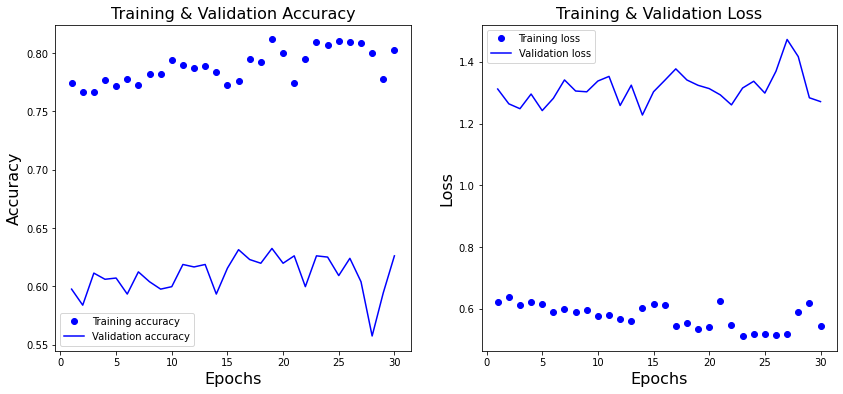

In [12]:
Graph_Accuracy_Loss(history)